### Performing Data Analysis_ on Sales Data

In [290]:
## import the library
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Preparing datasets

In [291]:
files = [file for file in os.listdir('SalesData')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [292]:
### concatinating all datasets in to one dataframe
all_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv('SalesData/' + file)
    all_data = pd.concat([all_data , current_data])

all_data.shape

(186850, 6)

### Exploratory Data Analysis

In [293]:
### Exploring the dataframe
df = all_data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [294]:
## Check the null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [295]:
### Drop the null values form the datasets
df = df.dropna(how = 'all') ## we can try different imputer
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [296]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Analyzing Monthly Sales

#####
    Q. Which is the best month for sales?

In [297]:
### define a lambda function that split the date and time
df['month'] = df['Order Date'].apply(lambda x: x.split('/')[0])

## checking the updated values
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [298]:
### check the unique value of the feature
df['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [299]:
### filter the invalid data
filt = df['month'] == 'Order Date'

## all apart the invalid data
df = df[~filt] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [300]:
### deine a function that can convert string in to an integer
def to_int(col):
    return col.astype('int')

## apply the defined function
df[['month', 'Quantity Ordered']] = df[['month', 'Quantity Ordered']].apply(lambda x:to_int(x))

### check if the function in working in the dataset
df.dtypes 

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object

In [301]:
### convert the price value in to a floating
df['Price Each'] = df['Price Each'].astype('float')

In [302]:
### calculate the sale 
## sale = quantity ordered * price 

## add the sale feature to the dataset
df['sales']  = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [303]:
### to add the month name in the x-axis

## make a dictionary of the months name and map the months 
months = pd.date_range('2022-01-01', periods=12, freq='MS')
num_list = [i for i in range(1, 13)]
month_names = months.strftime("%B")
mon_dict = {num: name for name, num in zip(month_names, num_list)}

## map the month_name with the dict
df['month_name'] = df['month'].map(mon_dict)
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,April


In [304]:
### group by months : to check the overall sale in the month
mon_sale = df.groupby('month_name')['sales'].sum().sort_values()
mon_sale

month_name
January      1822256.73
September    2097560.13
February     2202022.42
August       2244467.88
June         2577802.26
July         2647775.76
March        2807100.38
May          3152606.75
November     3199603.20
April        3390670.24
October      3736726.88
December     4613443.34
Name: sales, dtype: float64

Text(0, 0.5, 'Months')

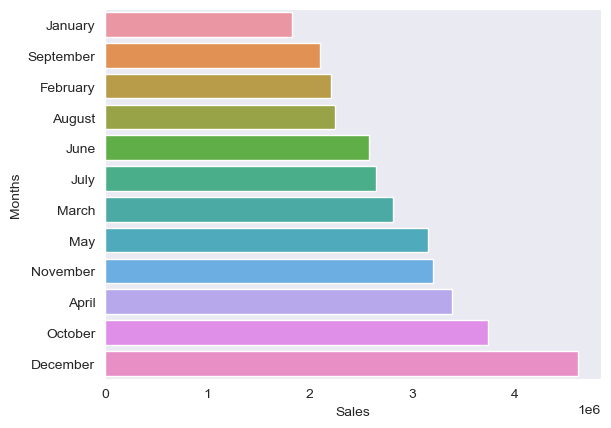

In [305]:
### Visualize sales in each months
sns.set_style('dark')
sns.barplot(y = mon_sale.index , x  = mon_sale.values)
plt.xlabel('Sales')
plt.ylabel('Months')

- The data indicates that the month of December had the highest sales, while the lowest sales were recorded in January

### Analyzing Maximum Order and hour Analysis

####
     Q. Which city has the maximum sales?

In [306]:
### so we need to split the address so that to get the city
df[['Address_num', 'city', 'state']] = df['Purchase Address'].str.split(',' , expand = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name,Address_num,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,April,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,April,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,April,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,April,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,April,333 8th St,Los Angeles,CA 90001


In [307]:
## get the state
df[['ind', 'states', 'zip_code']] = df['state'].str.split(' ',  expand = True)
df = df.drop(['ind', 'Address_num','state'], axis = 1) 

In [308]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name,city,states,zip_code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,April,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,April,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,April,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,April,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,April,Los Angeles,CA,90001


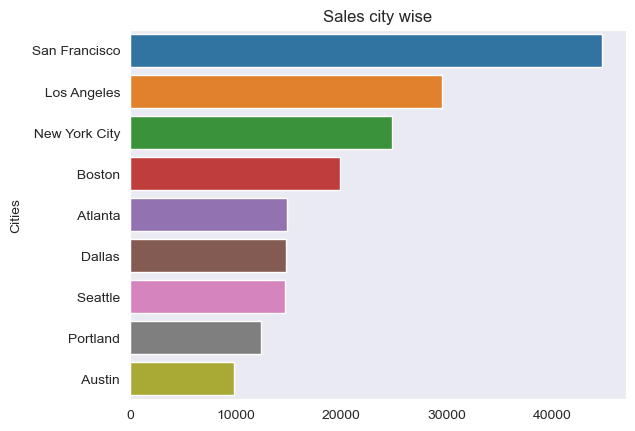

In [309]:
## group by the cities and get the sum of sales
top_cities = df.groupby('city')['city'].count().sort_values(ascending = False)

## plot the sales vs cities
sns.barplot(y = top_cities.index, x= top_cities.values)
plt.ylabel('Cities')
plt.title('Sales city wise');

- Based on the results, it appears that San Francisco had the highest sales. This could be attributed to various factors such as the high demand for electronics in Silicon Valley, increased technology advertising in the area, or the generally higher income of people living in San Francisco.

#### 
    Q. What time should we display advertisements to maximize likelihood of customer's buying products?

In [310]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name,city,states,zip_code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,April,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,April,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,April,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,April,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,April,Los Angeles,CA,90001


In [311]:
### get the hours with max sales
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order_hours'] = df['Order Date'].dt.hour
max_hour = df.groupby(df['Order_hours'])['sales'].sum().sort_values(ascending = False)

<Axes: xlabel='Order_hours'>

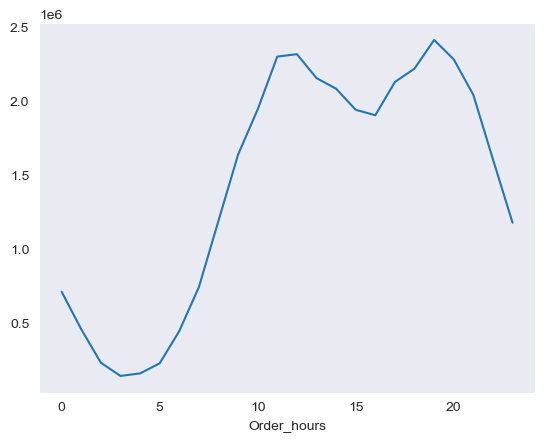

In [312]:
### plot hours vs sales
sns.lineplot(x = max_hour.index, y = max_hour.values)

In [313]:
### get the max and min sales 
max_value = max_hour.values.max()
max_index = max_hour.index[max_hour.values.argmax()]
min_value = max_hour.values.min()
min_index = max_hour.index[max_hour.values.argmin()]

print('Max sales hour:', max_value, '\nMax sales hour:', max_index)
print('Min sales hour:', min_value, '\nMin sales hour:', min_index)

Max sales hour: 2412938.54 
Max sales hour: 19
Min sales hour: 145757.89 
Min sales hour: 3


- According to the data, the highest sales figures are typically observed at around 7:00 PM, while the lowest sales figures are observed around 3:00 AM.

#### Analysing Most Sold Products

#####
    Q. Which product is most sold and why?

In [314]:
prod = df.groupby(df['Product'])['Quantity Ordered'].sum().sort_values(ascending = False)

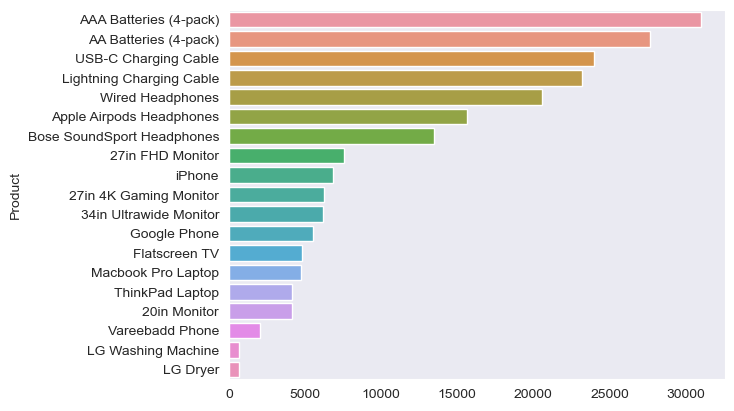

In [315]:
sns.barplot(y = prod.index, x = prod.values);

- Data showes that batteries are the one that sold the most in all the cities

###
    Check the mean price of each product

In [316]:
### get the product mean price
price = df.groupby('Product')['Price Each'].mean().sort_values()

<Axes: ylabel='Product'>

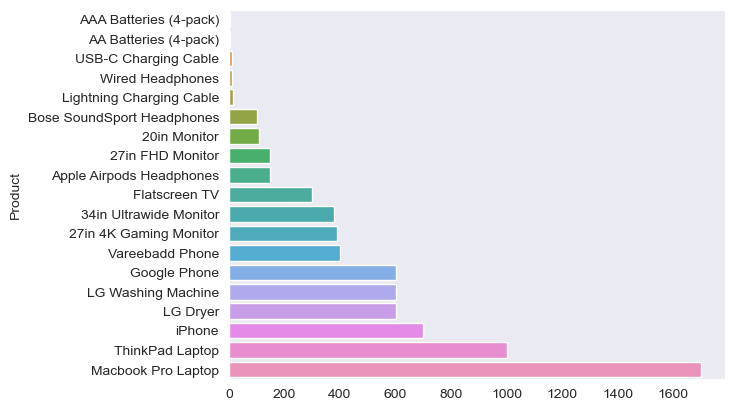

In [317]:
sns.barplot(y = price.index, x = price.values)

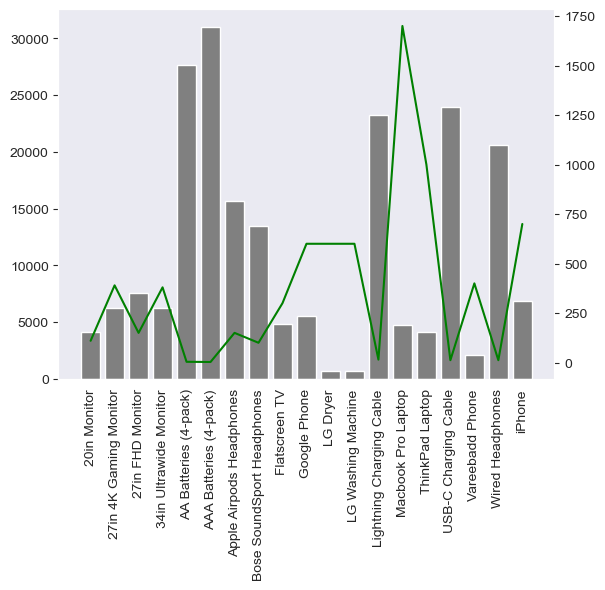

In [318]:
#Creating Twin plots
products = df.groupby('Product')['Quantity Ordered'].sum().index
quantity = df.groupby('Product')['Quantity Ordered'].sum()
prices = df.groupby('Product')['Price Each'].mean()
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='gray')
ax2.plot(products,prices, color='g')
ax1.set_xticklabels(products,rotation='vertical');

- Based on the data, it appears that the product with the higher selling rate has a relatively lower price.

###
    Q.Which Products are most often sold together?

In [319]:
### first lets get the duplicate
df_dub = df[df['Order ID'].duplicated(keep = False)]
df_dub.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,month_name,city,states,zip_code,Order_hours
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,April,Los Angeles,CA,90001,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,April,Los Angeles,CA,90001,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,April,Los Angeles,CA,90001,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,April,Los Angeles,CA,90001,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,April,Boston,MA,02215,11


In [320]:
df_dub['grouped'] = df_dub.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))
df_dub = df_dub.drop('Order ID', axis = 1)


Text(0, 0.5, '')

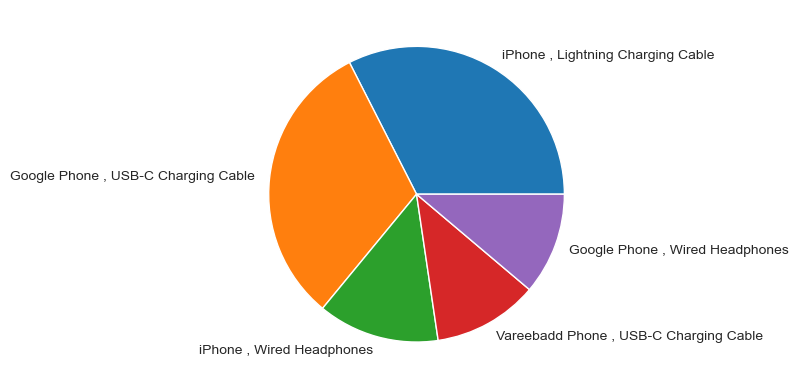

In [338]:
df_dub['grouped'].value_counts().head().plot(kind = 'pie')
plt.ylabel('')

In [325]:
from itertools import combinations
from collections import Counter ## this works with list

In [339]:
count = Counter()
for row in df_dub['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) ## can make 3 items
#print(count)  ## a bit messy
##count.most_common(10)
for key, value in count.most_common(10):
    print(key, value)


('iPhone ', ' Lightning Charging Cable') 1776
('Google Phone ', ' USB-C Charging Cable') 1722
('iPhone ', ' Wired Headphones') 971
('Google Phone ', ' Wired Headphones') 916
('iPhone ', ' Apple Airpods Headphones') 701
('Vareebadd Phone ', ' USB-C Charging Cable') 624
('Google Phone ', ' Bose SoundSport Headphones') 415
('Google Phone ', ' USB-C Charging Cable ') 394
('iPhone ', ' Lightning Charging Cable ') 364
(' USB-C Charging Cable ', ' Wired Headphones') 348


> This concept could enhance the value of a business transaction by providing additional incentives, such as promotional offers, when purchasing the primary item.